# Explore here

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
pd.read_csv(url, encoding= 'utf-8', quotechar= '"').to_csv('../data/raw/medical_insurance_cost.csv', index=False, encoding= 'utf-8')


In [51]:
df = pd.read_csv('../data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


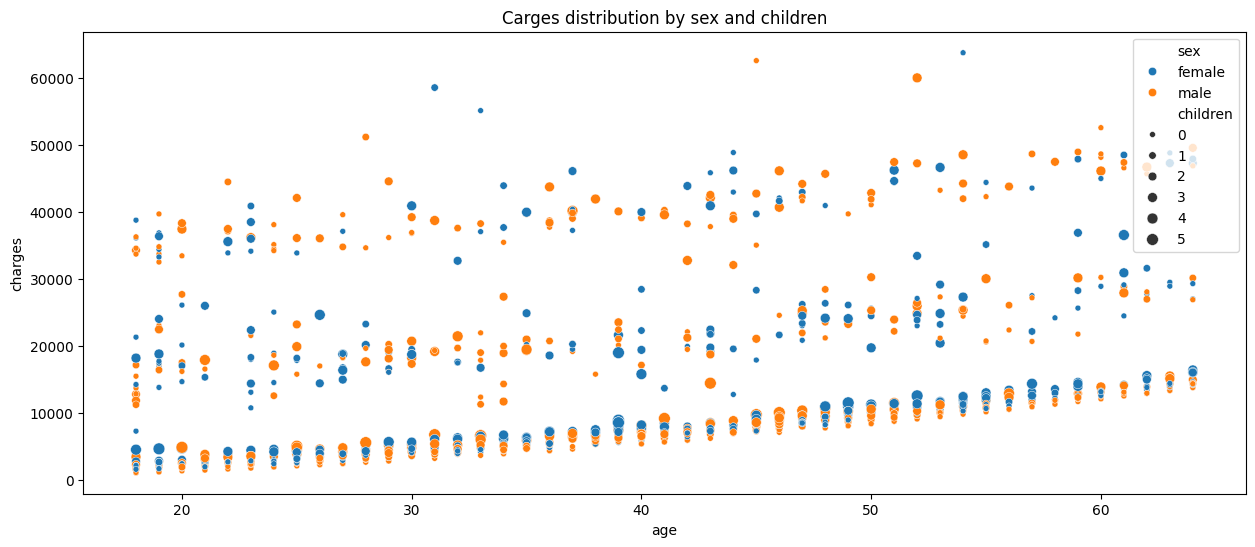

In [54]:
plt.figure(figsize=(15, 6))

sns.scatterplot(df, x = 'age', y= 'charges', hue='sex', size= 'children')

plt.title('Carges distribution by sex and children')
plt.show()

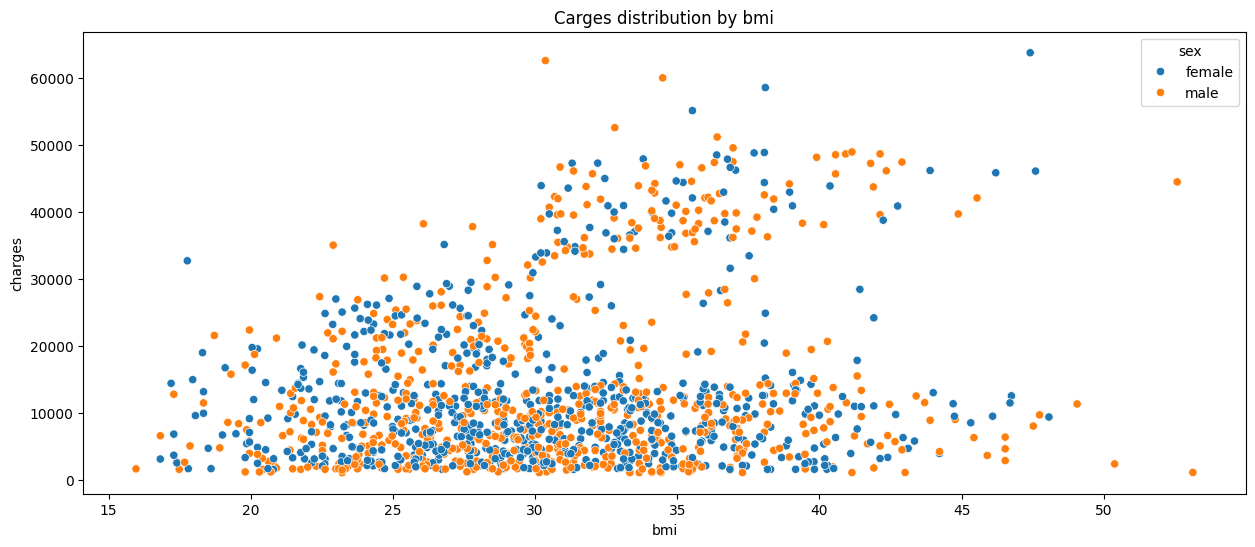

In [55]:
plt.figure(figsize=(15, 6))

sns.scatterplot(df, x = 'bmi', y= 'charges', hue='sex')

plt.title('Carges distribution by bmi')
plt.show()

In [56]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

nums = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

scaler = StandardScaler()
scal_features = scaler.fit_transform(df[nums])

df_scaled = pd.DataFrame(scal_features, index=df.index, columns=nums)

df_scaled['charges'] = df['charges']

df_scaled.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,-1.438764,-0.453320,-0.908614,-1.010519,-1.970587,-1.343905,16884.92400
1,-1.509965,0.509621,-0.078767,0.989591,0.507463,-0.438495,1725.55230
2,-0.797954,0.383307,1.580926,0.989591,0.507463,-0.438495,4449.46200
3,-0.441948,-1.305531,-0.908614,0.989591,0.507463,0.466915,21984.47061
4,-0.513149,-0.292556,-0.908614,0.989591,0.507463,0.466915,3866.85520


In [63]:
#train test split
X = df_scaled.drop(['charges', 'region_n'], axis = 1)
y = df_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [64]:
#linear regression model

model = LinearRegression()

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred = model.predict(X_test)

In [66]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [67]:
#compare y_pred

y_test = y_test.reset_index(drop=True)

pred = pd.DataFrame({'y_pred':y_pred})
pred['y_test'] = y_test
pred['error'] = pred['y_pred'] - pred['y_test']
pred

,y_pred,y_test,error
0,8554.817116,9095.06825,-540.251134
1,6973.587467,5272.17580,1701.411667
2,36798.604161,29330.98315,7467.621011
3,9417.882823,9301.89355,115.989273
4,26871.680311,33750.29180,-6878.611489
...,...,...,...
263,39220.995889,47055.53210,-7834.536211
264,11695.634124,12222.89830,-527.264176
265,7253.598675,6067.12675,1186.471925
266,40950.539904,63770.42801,-22819.888106


In [68]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(33979257.05080821, 0.7811302113434095)